In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde

# Give the location of the folder:
folder = "C:/Users/Me/Documents/J1407_code/"

In [4]:
# Read in the list of possible periods from the PFA
file = open(folder + 'list_of_possible_periods.txt', 'r')
body = file.readlines()[1:] # It is just a list of dec'yeears
list_of_periods = np.zeros((len(body),1))
for (i, entry) in enumerate(body):
    list_of_periods[i] = float(entry)

print ("Number of possible periods: " + str(len(list_of_periods)))

# Make binned data
s = 0.03
binned_data = np.zeros((42, 2))
total = int(365.25/s)
for i in range(len(binned_data)):
    counted_periods = (len([x for x in list_of_periods if (i<=(x/365.25)<i+1)]))
    binned_data[i] = i, counted_periods/total

Number of possible periods: 89187


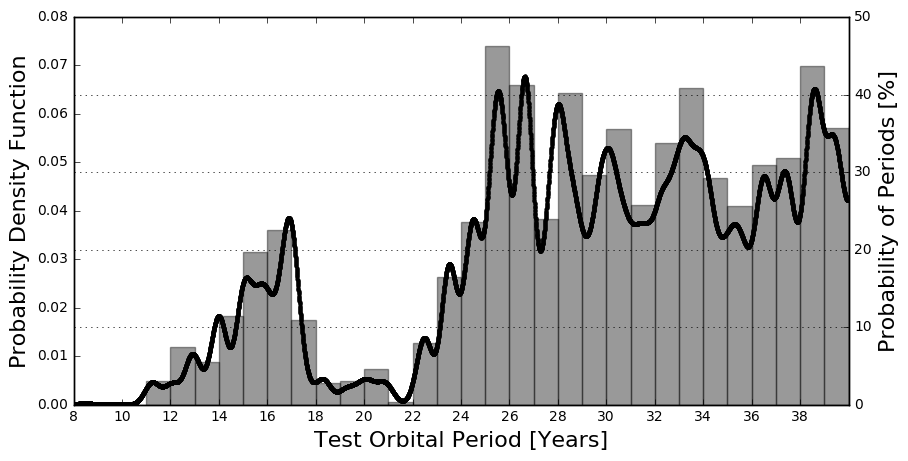

In [8]:
# Combined plot of KDE and bars
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot((111))
ax2 = ax.twinx()

low = 1
high = 41
N = 10001

ax.set_xlim(8, 40)
ax.set_ylim(0.0, 0.08)
ax2.set_ylim(0, 50)

ax2.bar(binned_data[:,0], binned_data[:,1]*100, fc='k', ec='k', width=1, alpha=0.4)
ax.scatter(np.linspace(low, high, N), gaussian_kde(list_of_periods[:,0]/365.25, 0.04)(np.linspace(low, high, N)), lw=0.8, c='k', marker=".")

ax.xaxis.set_ticks([8+2*x for x in range(16)])
ax.set_ylabel("Probability Density Function", fontsize=16)
ax2.set_ylabel("Probability of Periods [%]", fontsize=16)
ax.set_xlabel("Test Orbital Period [Years]", fontsize=16)
plt.grid("on")
# plt.savefig(folder + 'figure_4/figure_4.pdf')
# plt.savefig(folder + 'figure_4/figure_4.png')
plt.show()
plt.close()